In [68]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [3]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [4]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [5]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [6]:
def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

In [43]:
def envelope(y,rate,threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10),min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [7]:
df = pd.read_csv(r"C:\Users\Amit Anand\Desktop\audio_classification\Audio-Classification-master\instruments.csv")

In [8]:
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


In [ ]:
df.set_index('fname',inplace= True)

In [9]:
df.shape

(300, 2)

In [10]:
df.fname.isnull().sum()

0

In [11]:
df.fname.isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
for f in df.index:
    #print(str(df['fname']))

In [13]:
###what is the class distributuion#####
length = []
#i=0
for f in df.fname:
    #l=str(df['fname'])
    name = 'C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\wavfiles\\' + f
    #print(name)
    #print(i)
    #i=i+1
    rate, signal = wavfile.read(name)
    #print(signal.shape[0])
    length.append(signal.shape[0]/rate)

In [14]:
length

[4.14,
 1.54,
 4.9,
 10.5,
 6.24,
 3.7,
 5.0,
 15.22,
 15.4,
 11.3,
 8.12,
 4.34,
 2.04,
 6.16,
 7.6,
 3.74,
 11.88,
 5.0,
 5.08,
 10.02,
 3.74,
 8.28,
 2.82,
 11.24,
 5.38,
 6.66,
 13.58,
 5.9,
 4.42,
 9.78,
 2.96,
 3.22,
 19.28,
 1.3,
 1.74,
 7.64,
 6.34,
 4.5,
 1.62,
 1.06,
 6.34,
 1.72,
 3.0,
 6.28,
 3.5,
 1.46,
 6.08,
 16.68,
 1.5,
 1.04,
 1.34,
 2.72,
 3.9,
 4.02,
 1.94,
 15.24,
 2.68,
 1.52,
 3.52,
 1.76,
 3.14,
 4.18,
 4.18,
 4.18,
 3.14,
 1.68,
 3.14,
 1.68,
 1.68,
 4.18,
 3.14,
 3.14,
 3.14,
 3.14,
 3.14,
 1.72,
 1.68,
 3.14,
 5.6,
 3.14,
 1.68,
 4.18,
 3.14,
 4.18,
 4.18,
 4.18,
 3.14,
 4.18,
 3.14,
 6.56,
 5.98,
 1.68,
 8.72,
 3.6,
 1.08,
 1.46,
 1.26,
 1.26,
 1.34,
 4.48,
 6.26,
 1.46,
 10.0,
 1.74,
 1.88,
 8.8,
 5.98,
 4.22,
 5.2,
 6.22,
 12.18,
 1.68,
 2.0,
 1.08,
 1.26,
 10.92,
 3.18,
 1.02,
 2.0,
 1.68,
 10.0,
 8.02,
 4.0,
 3.34,
 21.74,
 3.14,
 8.22,
 7.92,
 8.42,
 3.14,
 2.18,
 4.18,
 3.14,
 6.96,
 7.12,
 3.86,
 3.14,
 3.14,
 5.22,
 3.32,
 2.1,
 4.18,
 3.14,
 8.02,
 

In [15]:
df['length']=length

In [16]:
df.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


In [17]:
np.unique(df.label)

array(['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass',
       'Flute', 'Hi-hat', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle'],
      dtype=object)

In [18]:
classes= list(np.unique(df.label))

In [19]:
####computing class distribution using grp-by###########
class_dist=df.groupby(['label'])['length'].mean()

In [20]:
class_dist

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

In [21]:
class_dist.index

Index(['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass',
       'Flute', 'Hi-hat', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle'],
      dtype='object', name='label')

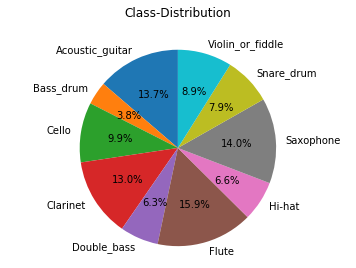

In [22]:
fig, ax = plt.subplots()
ax.set_title("Class-Distribution", y = 1.08)
ax.pie(class_dist, labels = class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')# makes looks like a circle otherwise it will come out to eclipse
plt.show()
df.reset_index(inplace=True)

In [23]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [24]:
classes

['Acoustic_guitar',
 'Bass_drum',
 'Cello',
 'Clarinet',
 'Double_bass',
 'Flute',
 'Hi-hat',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle']

In [30]:
df.drop(['index'], axis=1, inplace= True)

In [31]:
df

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24
5,8fa096bf.wav,Saxophone,3.70
6,2f9c5f62.wav,Saxophone,5.00
7,9cd05a2b.wav,Saxophone,15.22
8,ab465bf9.wav,Saxophone,15.40
9,c40632d7.wav,Saxophone,11.30


In [32]:
for c in classes:
    print(c)
    #print(df[df.label== c])
    wavfile = df[df.label == c].iloc[0,0]
    print(wavfile)

Acoustic_guitar
17f82c05.wav
Bass_drum
52e54bdd.wav
Cello
e2d993ec.wav
Clarinet
a64a3740.wav
Double_bass
e6597186.wav
Flute
18865530.wav
Hi-hat
078f7ac0.wav
Saxophone
5388d14d.wav
Snare_drum
229be2be.wav
Violin_or_fiddle
d6144e01.wav


In [33]:
for c in classes:
    #print(df.label== c)
    wavfile = df[df.label == c].iloc[0,0]
    
    signal , rate = librosa.load('C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\wavfiles\\' + wavfile, sr = 44100 )
    #mask = envelope(signal,rate, 0.0005)
    #signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)
    
    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[c] = bank
    mel =  mfcc(signal[:rate],rate,numcep = 13, nfilt = 26, nfft = 1103).T
    mfccs[c] = mel

In [34]:
signals

{'Acoustic_guitar': array([-1.7700195e-03, -2.5634766e-03, -4.2419434e-03, ...,
         0.0000000e+00, -6.1035156e-05,  0.0000000e+00], dtype=float32),
 'Bass_drum': array([ 1.1291504e-03,  1.1291504e-03,  1.1901855e-03, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32),
 'Cello': array([-6.7138672e-04, -6.4086914e-04, -6.7138672e-04, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32),
 'Clarinet': array([ 3.3569336e-04,  3.6621094e-04,  3.3569336e-04, ...,
        -6.1035156e-05,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 'Double_bass': array([ 3.6010742e-03,  3.8452148e-03,  4.1809082e-03, ...,
         3.0517578e-05, -6.1035156e-05,  0.0000000e+00], dtype=float32),
 'Flute': array([0.00018311, 0.00024414, 0.00021362, ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 'Hi-hat': array([-4.8828125e-04,  9.1552734e-05, -1.0070801e-03, ...,
        -6.1035156e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32),

<function matplotlib.pyplot.show(*args, **kw)>

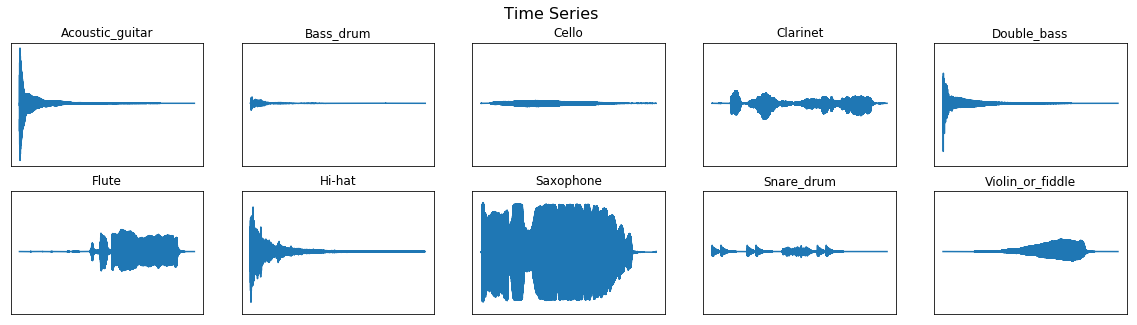

In [35]:
plot_signals(signals)
plt.show

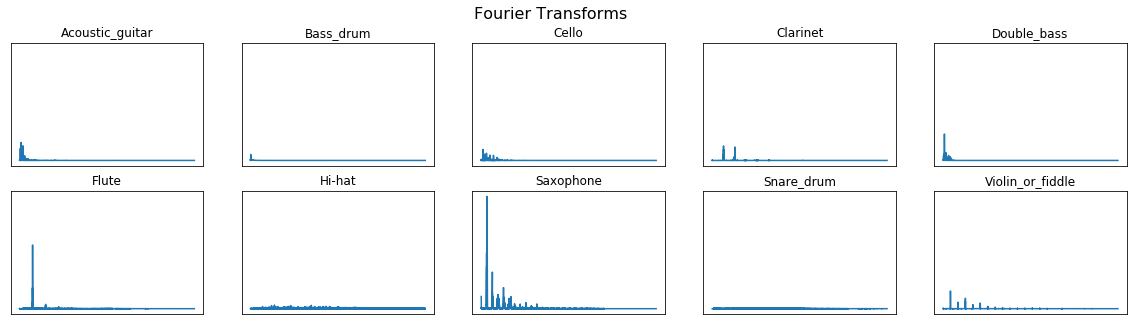

In [36]:
plot_fft(fft)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

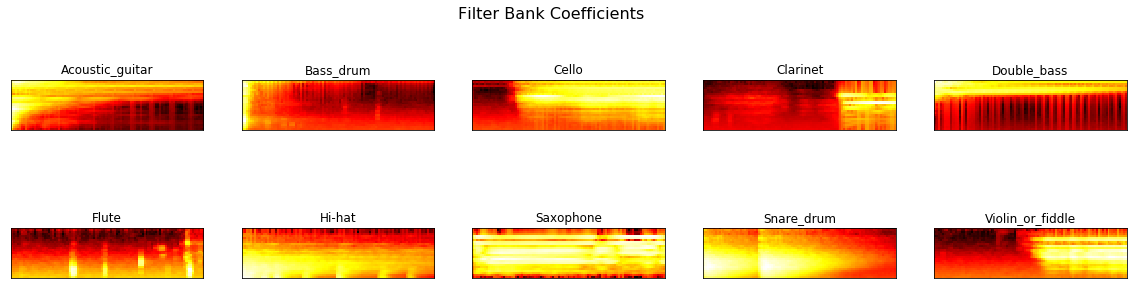

In [38]:
plot_fbank(fbank)
plt.show

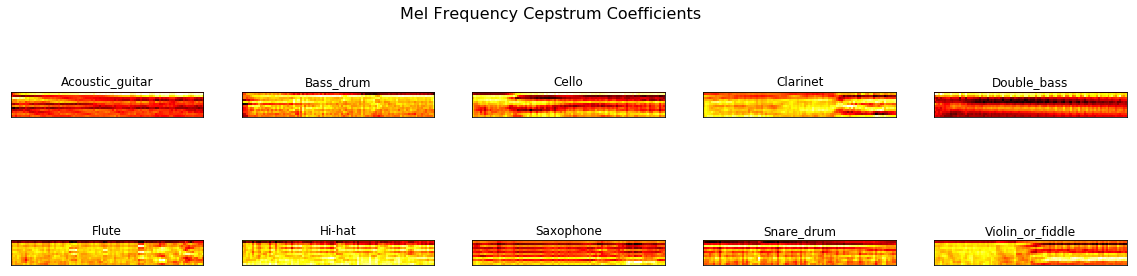

In [39]:
plot_mfccs(mfccs)
plt.show()

In [59]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [60]:
########removing dead space in audio (silence)############
for c in classes:
    #print(df.label== c)
    wavfile = df[df.label == c].iloc[0,0]
    signal , rate = librosa.load('C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\wavfiles\\' + wavfile, sr = 44100 )
    mask = envelope(signal,rate, 0.001)
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)
    
    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[c] = bank
    mel =  mfcc(signal[:rate],rate,numcep = 13, nfilt = 26, nfft = 1103).T
    mfccs[c] = mel

<function matplotlib.pyplot.show(*args, **kw)>

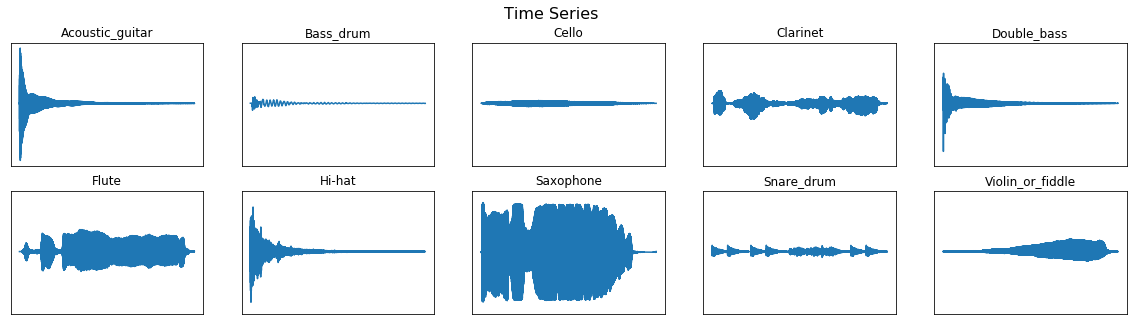

In [61]:
plot_signals(signals)
plt.show

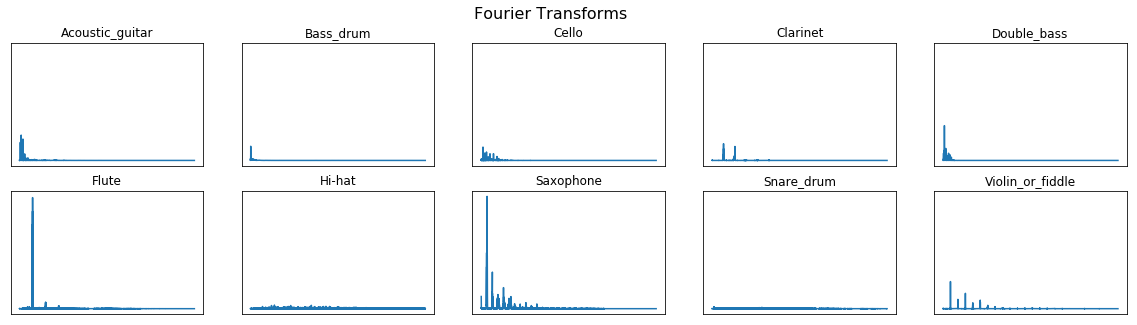

In [62]:
plot_fft(fft)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

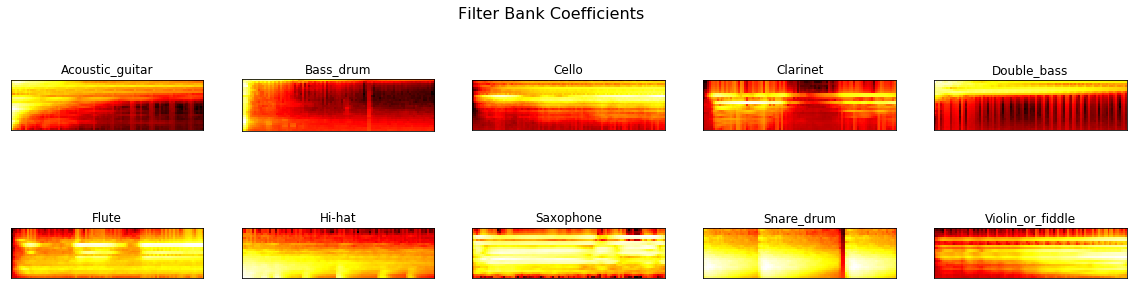

In [63]:
plot_fbank(fbank)
plt.show

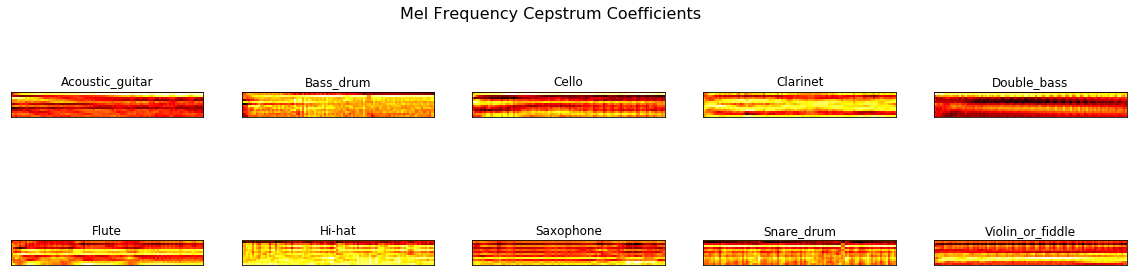

In [64]:
plot_mfccs(mfccs)
plt.show()

In [69]:
##############################creating cleaned dataset without silent###########################
if len(os.listdir('C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\clean')) == 0:
    for f in tqdm(df.fname):
        signal, rate =librosa.load('C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\wavfiles\\' + f, sr=16000)
        mask = envelope(signal, rate, 0.001)
        wavfile.write(filename='C:\\Users\\Amit Anand\\Desktop\\audio_classification\\Audio-Classification-master\\clean\\'+f, rate=rate , data = signal[mask])


100%|████████████████████████████████████████| 300/300 [01:35<00:00,  3.46it/s]


In [71]:
signal.shape

(53440,)